# Requierements

In [1]:
from matplotlib.patches import Polygon
from sympy import *
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
def plot_function(functions_list):
   
    x_min = -10
    x_max = 10
    y_min = -10
    y_max = 10

    # Plotter Settings
    point = 1000   
    x = np.linspace(x_min, x_max, point)
    fig, ax = plt.subplots()
    plt.axis([x_min, x_max, y_min, y_max]) # window size
    plt.plot([x_min, x_max], [0, 0], 'k', linestyle='--', linewidth=0.5)  # x axis
    plt.plot([0, 0], [y_min, y_max], 'k', linestyle='--', linewidth=0.5)  # y axis
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_title("Function Plotter") 
    ax.grid(True)  
    
    # Input the function as a string in a list
    for func in functions_list:
        y = eval(func)    # convert the function string into actual calculated y-values
        plt.plot(x, y, label=func)
    
    plt.legend()
    plt.show()


# 1._Graph one or more functions

In [3]:
def plot_function(functions_list):
   
    x_min = -10
    x_max = 10
    y_min = -10
    y_max = 10

    # Plotter Settings
    point = 1000   
    x = np.linspace(x_min, x_max, point)
    fig, ax = plt.subplots()
    plt.axis([x_min, x_max, y_min, y_max]) # window size
    plt.plot([x_min, x_max], [0, 0], 'k', linestyle='--', linewidth=0.5)  # x axis
    plt.plot([0, 0], [y_min, y_max], 'k', linestyle='--', linewidth=0.5)  # y axis
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_title("Function Plotter") 
    ax.grid(True)  
    
    # Input the function as a string in a list
    for func in functions_list:
        y = eval(func)    # convert the function string into actual calculated y-values
        plt.plot(x, y, label=func)
    
    plt.legend()
    plt.show()


## 1.1_Input to plotter

<string>:1: RuntimeWarning: invalid value encountered in sqrt


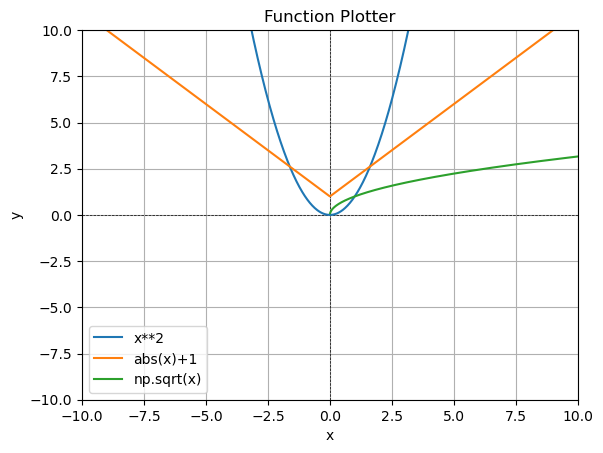

In [4]:
# Specify between the brackets the list of functions to graph as a string.
# Example: plot_function(["x**2", "x**3"])
plot_function(["x**2", "abs(x)+1", "np.sqrt(x)"])

# 2._Create a table of (x,y) values

In [5]:
def table_xy(function_str, x_range=(-5, 6)): # Define a function to create a table of x and y values and the range of x values
    
    x = range(x_range[0], x_range[1])
    print("x  |  y")
    print("---------")
    print(function_str)
    for x_val in x:
        y = eval(function_str.replace('x', str(x_val)))
        print(f"{x_val:2d} | {y:4.1f}")

## 2.2_Input to table

In [6]:
# Create table for x² function
table_xy('x**2')

# Custom range
table_xy('x**2', x_range=(0, 4))


x  |  y
---------
x**2
-5 | -25.0
-4 | -16.0
-3 | -9.0
-2 | -4.0
-1 | -1.0
 0 |  0.0
 1 |  1.0
 2 |  4.0
 3 |  9.0
 4 | 16.0
 5 | 25.0
x  |  y
---------
x**2
 0 |  0.0
 1 |  1.0
 2 |  4.0
 3 |  9.0


# 3._Shade above or below the line


In [7]:
def plot_function_shade(functions_list, shade=None):
   
    x_min = -10
    x_max = 10
    y_min = -10
    y_max = 10

    # Plotter Settings
    point = 100   
    x = np.linspace(x_min, x_max, point)
    fig, ax = plt.subplots()
    plt.axis([x_min, x_max, y_min, y_max]) # window size
    plt.plot([x_min, x_max], [0, 0], 'k', linestyle='--', linewidth=0.5)  # x axis
    plt.plot([0, 0], [y_min, y_max], 'k', linestyle='--', linewidth=0.5)  # y axis
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_title("Function Plotter") 
    ax.grid(True)  
    
    # Input the function as a string in a list
    for func in functions_list:
        y = eval(func)    # convert the function string into actual calculated y-values
        plt.plot(x, y, label=func)
         
        if shade:
            if shade == 'above':
                if func == functions_list[0]:
                    plt.fill_between(x, y, y_max, alpha=0.3)
                else:
                    prev_y = eval(functions_list[functions_list.index(func)-1])
                    plt.fill_between(x, y, prev_y, alpha=0.3)
            elif shade == 'below':
                if func == functions_list[0]:
                    plt.fill_between(x, y, y_min, alpha=0.3)
                else:
                    prev_y = eval(functions_list[functions_list.index(func)-1])
                    plt.fill_between(x, y, prev_y, alpha=0.3)
    
    plt.legend()
    plt.show()


## 3.1_Input to plotter with shade

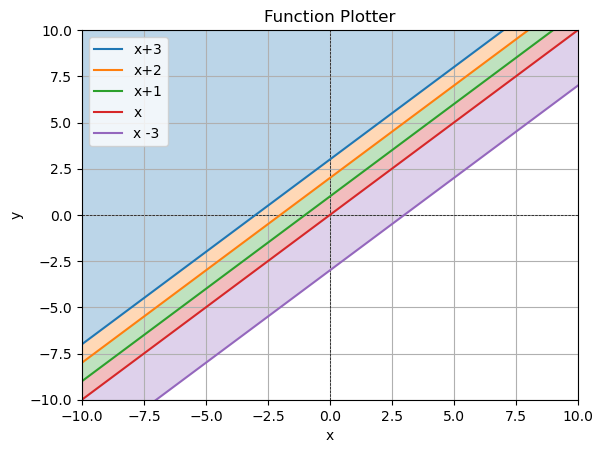

In [8]:
# Insert in the argument the list of function and the type of shade

plot_function_shade(["x+3", "x+2", "x+1", "x","x -3"], shade = "above")

# 4._Solve and graph a system of equations

In [9]:
def solve_system(eq1, eq2):
    from sympy import symbols, linsolve, solve, Eq, plot
    
    x, y = symbols("x y")
    
    # Create equations in standard form
    first = eq1
    second = eq2
    
    # Solve system
    solution = linsolve([first, second], (x, y))
    
    try:
        x_solution = solution.args[0][0] 
        y_solution = solution.args[0][1]
        print(f"\nSolution: ({x_solution}, {y_solution})")
        
        # Factor equations to y = mx + b form
        y_first = Eq(first, 0)
        y_second = Eq(second, 0)
        
        y1 = solve(y_first, y)[0]
        y2 = solve(y_second, y)[0]
        
        print(f"\nEquation 1: y = {y1}")
        print(f"Equation 2: y = {y2}")
        
        # Plot solution
        plot(y1, y2, (x, -10, 10), title="System of Equations")
        
    except:
        print("\nNo solution exists or system has infinite solutions")


## 4.1_Input to solver


Solution: (-1, 3)

Equation 1: y = 1 - 2*x
Equation 2: y = x/2 + 7/2


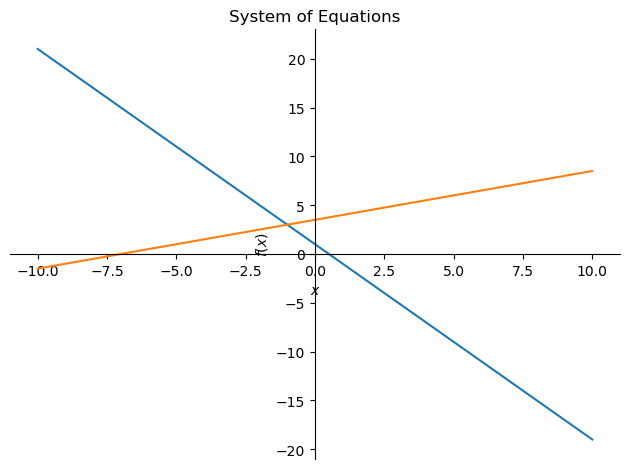

In [10]:
x, y = symbols("x y")
equation1 = 2*x +   y - 1  # 2x + y = 1
equation2 =   x - 2*y + 7  # x - 2y = -7
solve_system(equation1, equation2)

# 5._Zoom in or out on a graph (linear, quadratic & cubic)


In [11]:
# Define the graphing function
def plot_function(f, zoom=10, **params):
    x_min = -zoom
    x_max = zoom
    y_min = -zoom
    y_max = zoom
    points = 10*(x_max-x_min)
    
    x = np.linspace(x_min, x_max, points)

    plt.axis([x_min, x_max, y_min, y_max])
    plt.plot([x_min, x_max], [0, 0], "k")
    plt.plot([0, 0], [y_min, y_max], 'k')
    plt.title(f"y = {f.__name__}(x)")
    plt.grid(True)
    
    y = f(x, **params)

    # Create function expression string based on parameters (thats so good¡¡¡¡)
    if f.__name__ == 'linear':
        label = f"y = {params['m']}x + {params['b']}"
    elif f.__name__ == 'quadratic':
        label = f"y = {params['a']}x² + {params['b']}x + {params['c']}"
    elif f.__name__ == 'cubic':
        label = f"y = {params['a']}x³ + {params['b']}x² + {params['c']}x + {params['d']}"
    
    plt.plot(x, y, label=label)
    plt.legend()
    plt.show()

def linear(x, m=1, b=0):
    return m*x + b

def quadratic(x, a=1, b=0, c=0):
    return a*x**2 + b*x + c

def cubic(x, a=1, b=0, c=0, d=0):
    return a*x**3 + b*x**2 + c*x + d


# Set up the interactive plots
linear_plot = interactive(lambda m, b, zoom: plot_function(linear, zoom, m=m, b=b), 
                                            m=(-10, 10), b=(-10, 10), zoom=(1,10))

quadratic_plot = interactive(lambda a, b, c, zoom: plot_function(quadratic, zoom, a=a, b=b, c=c),
                                               a=(-10, 10), b=(-10, 10), c=(-10, 10), zoom=(1,10))

cubic_plot = interactive(lambda a, b, c, d, zoom: plot_function(cubic, zoom, a=a, b=b, c=c, d=d),
                                            a=(-10, 10), b=(-10, 10), c=(-10, 10), d=(-10, 10), zoom=(1,10))



## 5.1_ Input to Plot Menu

In [12]:
# Menu to select the function to plot
# Prompt the function number to plot
# Prompt the number 4 to exit

def show_plot_menu():
    while True:
        print("\nGraphing Calculator Menu:")
        print("1. Linear Function")
        print("2. Quadratic Function")
        print("3. Cubic Function")
        print("4. Exit")

        choice = input("Enter your choice (1-4): ")

        if choice == '1':
            display(linear_plot)
        elif choice == '2':
            display(quadratic_plot)
        elif choice == '3':
            display(cubic_plot)
        elif choice == '4':
            break
        else:
            print("Invalid choice. Please try again.")
# Start the menu
show_plot_menu()


Graphing Calculator Menu:
1. Linear Function
2. Quadratic Function
3. Cubic Function
4. Exit
Invalid choice. Please try again.

Graphing Calculator Menu:
1. Linear Function
2. Quadratic Function
3. Cubic Function
4. Exit


interactive(children=(IntSlider(value=0, description='a', max=10, min=-10), IntSlider(value=0, description='b'…


Graphing Calculator Menu:
1. Linear Function
2. Quadratic Function
3. Cubic Function
4. Exit


# 6._Solve quadratic equations


In [13]:
def solve_quadratic(a, b, c):

    print("y = ", a,"x² + ", b,"x + ",c)
    
    # Vertex
    vx = -b/(2*a)
    vy = a*(vx**2) + b*vx + c
    print("Vertex: (", vx, ",", vy, ")")

    xmin = -10
    xmax = 10
    ymin = -10
    ymax = 10
    points = 10*(xmax-xmin)
    x = np.linspace(xmin,xmax,points)

    fig, ax = plt.subplots()
    plt.axis([xmin, xmax, ymin, ymax]) # window size
    plt.plot([xmin, xmax], [0,0], "b", linewidth = 0.5) # blue x axis
    plt.plot([0,0],[ymin,ymax], "b", linewidth = 0.5) # blue y axis
    plt.grid(True)
    plt.title("Quadratic Function")
    ax.set_xlabel("x values")
    ax.set_ylabel("y values")
   
    
    # Plot the parabola
    y1 = a*x**2 + b*x + c
    plt.plot(x, y1)
    
    # Plot the vertex point
    plt.plot([vx], [vy], "ko")

    # Discriminant
    discriminant = b**2 - 4*a*c
    if discriminant < 0:
        return "No real solutions"
    elif discriminant == 0:
        x = -b / (2*a)
        return f"One solution: x = {x}"
    else:
        x1 = (-b + np.sqrt(discriminant)) / (2*a) # Root 1
        x2 = (-b - np.sqrt(discriminant)) / (2*a) # Root 2
        plt.plot([x1, x2], [0,0], "ro")
        return f"Two solutions: x₁ = {x1:.2f}, x₂ = {x2:.2f}"
    

    

## 6.1_Input to solve quadratic equations

y =  1 x² +  2 x +  0
Vertex: ( -1.0 , -1.0 )


'Two solutions: x₁ = 0.00, x₂ = -2.00'

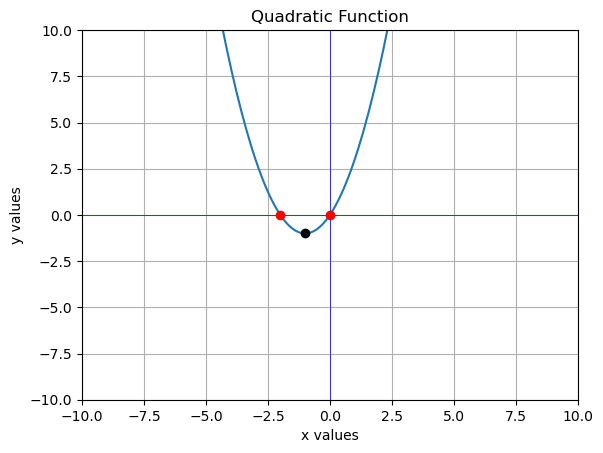

In [14]:
# Insert values for a, b, and c
a = 1
b = 2
c = 0
solve_quadratic(a, b, c)